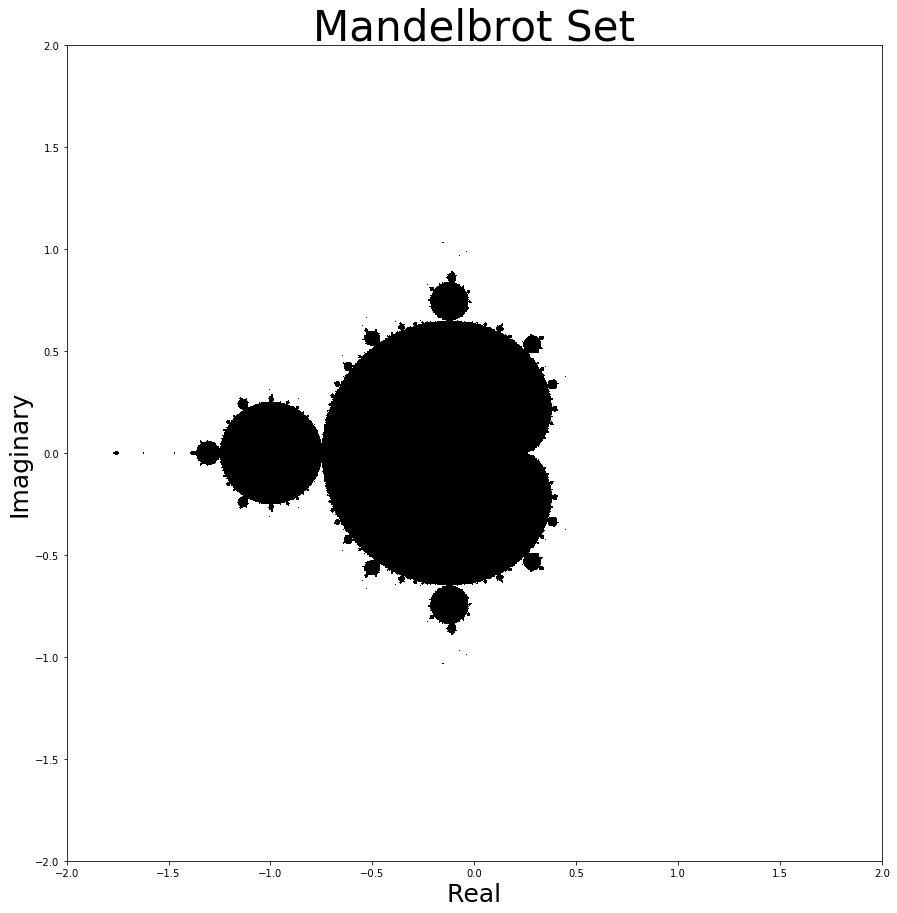

In [4]:
#Keoni Castellano
#Homework 3
#Mandelbrot Set

#This program will create an image of the Mandelbrot set by taking each point on the plane as a complex number and
#iterating it, from 0, 1000 times to check if any of its iterates have magnitude greater than 2. 
#If any iterates have too high a magnitude, the pixel is colored white.
#If its iterates stay small, then the pixel is colored black.
#This information is entered in a NxN array (N a fixed integer) where it is used to output a graph of the Mandelbrot set.

#Input: None
#Output: A graphical representation of the Mandelbrot set

from numpy import zeros
import numpy as np
import matplotlib.pyplot as plt

#Constant that determines the resolution of the outputted graph
N = 1000



#This function iterates a complex number from the origin 1000 times to check if any of its iterates have magnitude greater than 2
#If it has iterates with magnitude greater than 2, a 1.0 is returned.
#If none of its first 1000 iterates have magnitude greater than 2, a 0.0 is returned.
#Input: A complex number
#Output: A float (either 1.0 or 0.0)
def isMandelbrot(c):
    #Defines the generating equation for the Mandelbrot set for a given c value
    f = lambda z: z*z + c
    
    #Calculates the first iterate at the origin
    x = f(0 + 0j)
    
    #Checks if the iterates have magnitude greater than 2 and returns the appropriate float number
    if abs(x) > 2:
        return 1.0
    else:
        for i in range(999):
            x = f(x)
            if abs(x) > 2:
                return 1.0
            else: 
                i += 1
    return 0.0


#A blank NxN array that will be filled in to generate the Mandelbrot set
MandelSet = zeros([N, N], float)


#These generate the complex numbers that are tested for membership in the Mandelbrot set
xn = np.linspace(-2, 2, N)
yn = np.linspace(-2, 2, N)

#This pair of lists together form an index set for the coordinates of the Mandelbrot set array that will be used to actually
#graph the Mandelbrot set
x = range(N)
y = range(N)


#At each entry in the Mandelbrot set array, a 1.0 or 0.0 is entered, depending on if the tested complex number is in the 
#Mandelbrot set or not
for m in y:
    for n in x:
        MandelSet[m, n] = isMandelbrot(xn[n] + yn[m]*1j)

        
#Output

plt.figure(num = 1, figsize = (15,15))
plt.axis(xmin = -2, xmax = 2, ymin = -2, ymax = 2) 
plt.xlabel('Real', size = 25)
plt.ylabel('Imaginary', size = 25)
plt.title("Mandelbrot Set", size = 42)
plt.gray()
plt.imshow(MandelSet, origin = 'lower', aspect = 'equal', extent=[-2, 2, -2, 2])
plt.show()